In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
import datetime

In [2]:
df_loan = pd.read_csv("./data-set/loan.csv")
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
df_loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [4]:
df_loan.dropna(axis=1, how='all', inplace=True)

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [6]:
#dropping collections_12_mths_ex_med as all values are either 0 or NA
df_loan = df_loan.drop(['collections_12_mths_ex_med'],axis=1)
print(df_loan.isnull().sum())
#There are no rows having more than 6 values as Null
print(df_loan[df_loan.isnull().sum(axis=1) > 7])

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    2459
emp_length                   1075
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
desc                        12940
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
mths_since_last_delinq      25682
mths_since_las

In [7]:
df_loan['earliest_cr_line'] = pd.to_datetime(df_loan['earliest_cr_line'],format='%b-%y')
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'],format='%b-%y')
df_loan['last_credit_pull_d'] = pd.to_datetime(df_loan['last_credit_pull_d'],format='%b-%y')
df_loan['last_pymnt_d'] = pd.to_datetime(df_loan['last_pymnt_d'],format='%b-%y')
df_loan['next_pymnt_d'] = pd.to_datetime(df_loan['next_pymnt_d'],format='%b-%y')

In [8]:
#correcting column earliest_cr_line
df_loan['earliest_cr_line_corrected'] = 0
df_loan.loc[df_loan['earliest_cr_line'] > '2019-01-01', 'earliest_cr_line_corrected'] = df_loan['earliest_cr_line']-pd.DateOffset(years=100)
df_loan.loc[df_loan['earliest_cr_line'] < '2019-01-01', 'earliest_cr_line_corrected'] = df_loan['earliest_cr_line']
df_loan['earliest_cr_line_corrected'] = pd.to_datetime(df_loan['earliest_cr_line_corrected'])
df_loan = df_loan.drop(['earliest_cr_line'],axis=1)
df_loan.rename(columns = {'earliest_cr_line_corrected':'earliest_cr_line'}, inplace = True)
df_loan['earliest_cr_line']

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
5       2004-11-01
6       2005-07-01
7       2007-01-01
8       2004-04-01
9       2004-09-01
10      1998-01-01
11      1989-10-01
12      2004-04-01
13      2003-07-01
14      1991-05-01
15      2007-09-01
16      1998-10-01
17      1993-08-01
18      2003-10-01
19      2001-01-01
20      1997-11-01
21      1983-02-01
22      1985-07-01
23      2003-04-01
24      2001-06-01
25      2002-02-01
26      2003-10-01
27      2003-10-01
28      1984-08-01
29      2006-11-01
           ...    
39687   1995-04-01
39688   1996-01-01
39689   2004-05-01
39690   1969-02-01
39691   2003-08-01
39692   2003-04-01
39693   2002-12-01
39694   1987-12-01
39695   2000-07-01
39696   2000-01-01
39697   2003-09-01
39698   1999-01-01
39699   1995-06-01
39700   1989-03-01
39701   1992-02-01
39702   1993-04-01
39703   1997-02-01
39704   2000-09-01
39705   1997-10-01
39706   1996-06-01
39707   1995-02-01
39708   1995

In [9]:
#no duplicate data found
bool_series = df_loan["member_id"].duplicated() 
df_loan[bool_series]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,earliest_cr_line


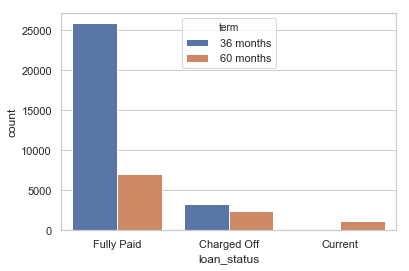

In [10]:
sns.set(style="whitegrid")
ax = sns.countplot(x="loan_status", data=df_loan, hue="term")

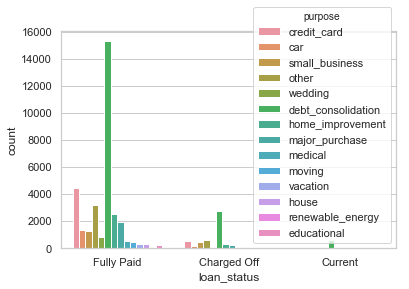

In [11]:
ax = sns.countplot(x="loan_status", data=df_loan, hue="purpose")

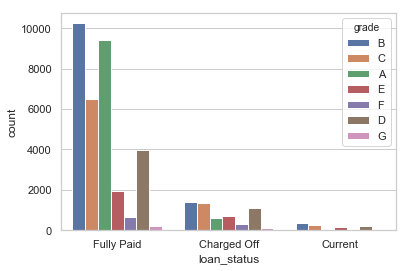

In [12]:
ax = sns.countplot(x="loan_status", data=df_loan, hue="grade")

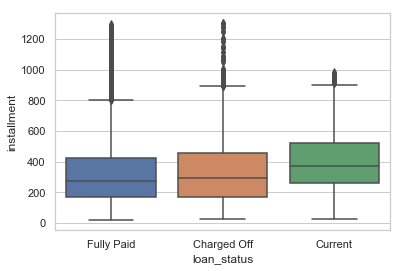

In [13]:
#Univariate analysis
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["installment"])
#for charged off loans, the 75% percentile data is higher

[  82300.    142000.    165757.92  234999.36 6000000.  ]


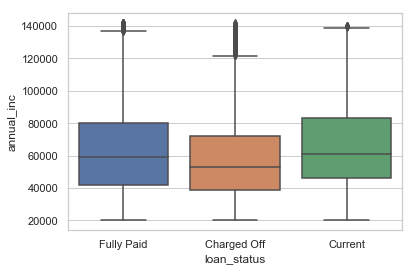

In [14]:
print(np.percentile(df_loan["annual_inc"],[75,95,97,99,100]))
sns.set(style="whitegrid")
df=df_loan[(df_loan["annual_inc"]<=142000) & (df_loan["annual_inc"]>20000)]
ax = sns.boxplot(x=df["loan_status"] ,y=df["annual_inc"])

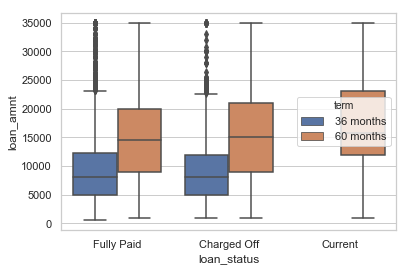

In [15]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["loan_amnt"], hue=df_loan['term'])
#Loan amount between the charged off and fully paid are almost same, this is not a driver 

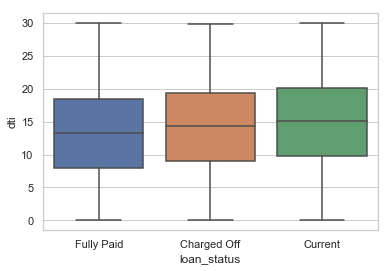

In [16]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["dti"])
#DTI could be a driver

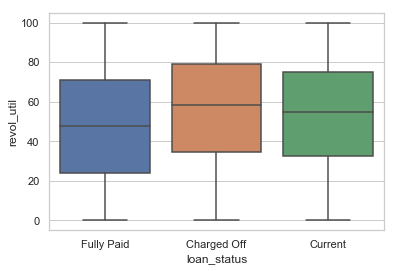

In [17]:
sns.set(style="whitegrid")
df_loan["revol_util"]= pd.to_numeric(df_loan["revol_util"].str.strip('%'))
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["revol_util"])
#revol_util could be a driver

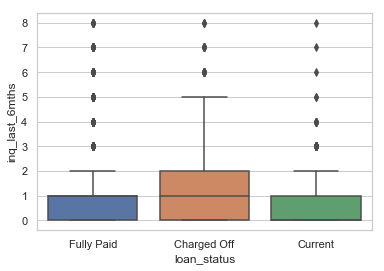

In [25]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["inq_last_6mths"])

[nan]


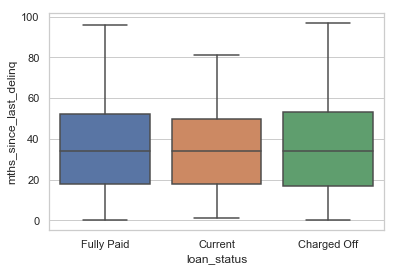

In [30]:
sns.set(style="whitegrid")
df=df_loan[df_loan["mths_since_last_delinq"]<100]
ax = sns.boxplot(x=df["loan_status"] ,y=df["mths_since_last_delinq"])

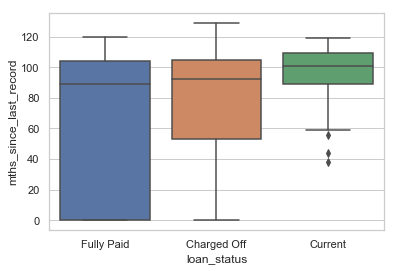

In [31]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_loan["loan_status"] ,y=df_loan["mths_since_last_record"])